In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# read data
loc = r'C:\Program Files\Python36\Scripts\Coursera_ML\ex1\ex1data2.txt'
data = pd.read_csv(loc, sep = ',', header = None)
data.shape

(47, 3)

In [33]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [36]:
# feature normalization
data.describe().loc[['mean', 'std'], :]

,0,1,2
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586


In [11]:
mu_std = data.describe().loc[['mean', 'std'], :]
type(mu_std)

pandas.core.frame.DataFrame

In [29]:
#test = pd.DataFrame([ (data.iloc[i, :].subtract(mu_std.loc['mean', :])) for i in range(len(data)) ])
#test.head()

In [30]:
# the same with the above calc
#test = data.subtract(mu_std.loc['mean', :])
#test.head()

In [31]:
#test2 = test.div(mu_std.loc['std', :])
#test2.head()

In [37]:
def featureNormalize(df):
    # calculate mu and std
    mu_std = df.describe().loc[['mean', 'std'], :]
    
    # normalize df
    df_mu = df.subtract(mu_std.loc['mean', :])
    df_normalized = df_mu.div(mu_std.loc['std', :])
    
    return df_normalized, mu_std

In [42]:
data_norm, ms = featureNormalize(data)

In [43]:
data_norm.head()

,0,1,2
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [45]:
# add one more col of 1 for x0
df_len = len(data_norm)
x0 = [1] * df_len
df0 = pd.DataFrame(x0)
df0.shape

(47, 1)

In [51]:
sample = pd.concat([df0, data_norm], axis = 1, sort = False)
sample.columns = ['x0', 'x1', 'x2', 'y']
sample.head()

,x0,x1,x2,y
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [52]:
# compute cost
# same as the previous func wirtten in simple linear reg
def computeCost(x, y, theta):
    m = len(y)
    hx = np.dot(x, theta)
    j = ((x.dot(theta) - y) ** 2).sum() / (2 * m)
    return j

In [53]:
# gradient descent
def gradient_descent(x, y, theta, alpha, num_iters):
    m = len(y)
    j_hist = [0] * num_iters
    
    for i in range(num_iters):
        hx = np.dot(x, theta)
        loss = hx - y
        # grad = x.T.dot(loss) / m
        grad = loss.dot(x) / m
        theta = theta - alpha * grad
        
        j_hist[i] = computeCost(x, y, theta)
    
    return theta, j_hist

In [88]:
# run a test
x = sample.iloc[:, :-1]
y = sample.iloc[:, -1]
theta = [0] * (x.shape[1])
alpha = 0.01
num_iters = 1500
theta_pred, j = gradient_descent(x, y, theta, alpha, num_iters)
theta_pred

x0   -1.109278e-16
x1    8.840423e-01
x2   -5.245518e-02
Name: y, dtype: float64

In [64]:
#a = [[4,2], [3, 5]]
#b = [5,6]
#np.dot(a, b)
# result = [32, 45]

array([32, 45], dtype=int64)

In [86]:
alpha1 = 0.01
theta_pred1, j1 = gradient_descent(x, y, theta, alpha1, 50)
alpha2 = 1
theta_pred2, j2 = gradient_descent(x, y, theta, alpha2, 50)
alpha3 = 0.1
theta_pred3, j3 = gradient_descent(x, y, theta, alpha3, 50)

Text(0,0.5,'J(theta)')

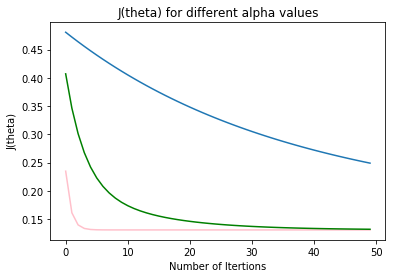

In [87]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('J(theta) for different alpha values')
plot1 = ax.plot(range(50), j1)
plot2 = ax.plot(range(50), j2, c = 'pink')
plot3 = ax.plot(range(50), j3, c = 'green')
ax.set_xlabel('Number of Itertions')
ax.set_ylabel('J(theta)')

In [94]:
# normal equations
def normalEqn(x, y):
    xx = x.T.dot(x)
    xx_inv = np.linalg.inv(np.matrix(xx))
    xxx = xx_inv.dot(x.T)
    theta = xxx.dot(y)
    return theta


# matrix inverse
# use np.linalg.inv can derive the result directly

In [95]:
x = sample.iloc[:, :-1]
y = sample.iloc[:, -1]

theta_equ = normalEqn(x, y)
theta_equ

matrix([[-1.11022302e-16,  8.84765988e-01, -5.31788197e-02]])

In [96]:
theta_pred

x0   -1.109278e-16
x1    8.840423e-01
x2   -5.245518e-02
Name: y, dtype: float64